## Lagrange Interpolation
<br />
Lagrange interpolation aims to generate a single polynomial function that connects every data point in a dataset.  Fitting n+1 data points with a nth degree polynomial.
This single Lagrange polynomial is a linear combination of several basis polynomial functions:

\begin{equation}
P_i(x)=\prod\limits_{j=1\,(j\ne i)}^{n}\frac{x-x_j}{x_i-x_j}.
\end{equation}

resulting in the Lagrange polynomial:

\begin{equation} 
L(x) = \sum\limits_{i=1}^{n}y_iP_i(x).
\end{equation}

The polynomials $P_{i,j}$
$(x_i)=1$ 
if 
$i=j$ or $0$ if $i \neq j$.

For a quadratic Lagrange polynomial, we obtain the following basis $L(x)$ polynomials:

\begin{align} 
\quad P_1(x) = \frac{(x - x_2)(x - x_3)}{(x_1 - x_2)(x_1 - x_3)}
\quad P_2(x) = \frac{(x - x_1)(x - x_3)}{(x_2 - x_1)(x_2 - x_3)} 
\quad P_3(x) = \frac{(x - x_1)(x - x_2)}{(x_3 - x_1)(x_3 - x_2)} 
\end{align}

Combining these polynomials with Lagrange multipliers, we get:

\begin{align} 
\quad L_2(x) = y_1P_1(x) + y_2P_2(x) + y_3P_3(x) = y_1 \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} + y_2 \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1- x_2)} + y_3 \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1- x_2)}
\end{align}

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Create python function to generate Lagrange n-1 degree Interpolation Polynomial where X and Y are the respective
# arrays of x and y data points to generate the interpolating function

class my_lagrange:

    def __init__(self, X, Y):
        self.n = len(X)
        self.X = np.array(X)
        self.Y = np.array(Y)

    def poly_basis(self, x, j):
        b = [(x - self.X[m]) / (self.X[j] - self.X[m])
             for m in range(self.n) if m != j]
        return np.prod(b, axis=0) * self.Y[j]

    def interpol_Y(self, x):
        b = [self.poly_basis(x, j) for j in range(self.n)]
        return np.sum(b, axis=0)
    

In [50]:
# Test case

X = [-8, -4, 0, 8]
Y = [4, -2, 1, -1]

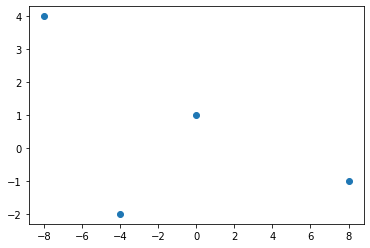

In [51]:
# plot the given data points as scatterplot

plt.scatter(X, Y)
plt.show()

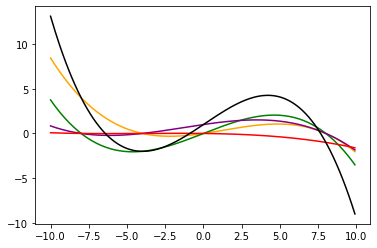

In [52]:
# Plot Basis Polynomials and Interpolation Function

L = my_lagrange(X, Y)

axis = np.arange(-100,100)/10

plt.plot(axis, L.poly_basis(axis, 0), color = "orange")
plt.plot(axis, L.poly_basis(axis, 1), color = "green")
plt.plot(axis, L.poly_basis(axis, 2), color = "purple")
plt.plot(axis, L.poly_basis(axis, 3), color = "red")
plt.plot(axis, L.interpol_Y(axis), linestyle='-', color='black')
plt.show()

Reference: https://stackoverflow.com/questions/4003794/lagrange-interpolation-in-python/8441768